In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [156]:
df = pd.read_csv("C:\\Users\\Izaya\\Downloads\\adult.csv")

In [158]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [164]:
df.sum().isnull()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [166]:
encoder = LabelEncoder()
for col in ["workclass","education", "marital-status","occupation", "relationship","race","gender","native-country","income"]:
    df[col] = encoder.fit_transform(df[col])

In [167]:
scaler = StandardScaler()
num_cols = ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]
df[num_cols] = scaler.fit_transform(df[num_cols])

Text(0.5, 1.0, 'Distribution of the Income')

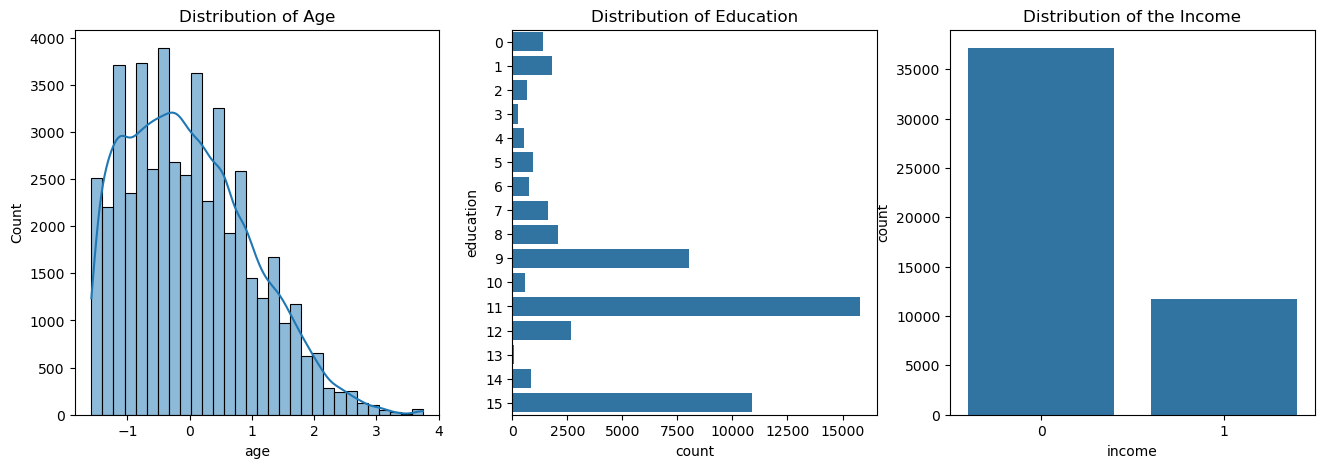

In [168]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.countplot(y=df['education'])
plt.title('Distribution of Education')

plt.subplot(1,3,3)
sns.countplot(x=df["income"] )
plt.title("Distribution of the Income")

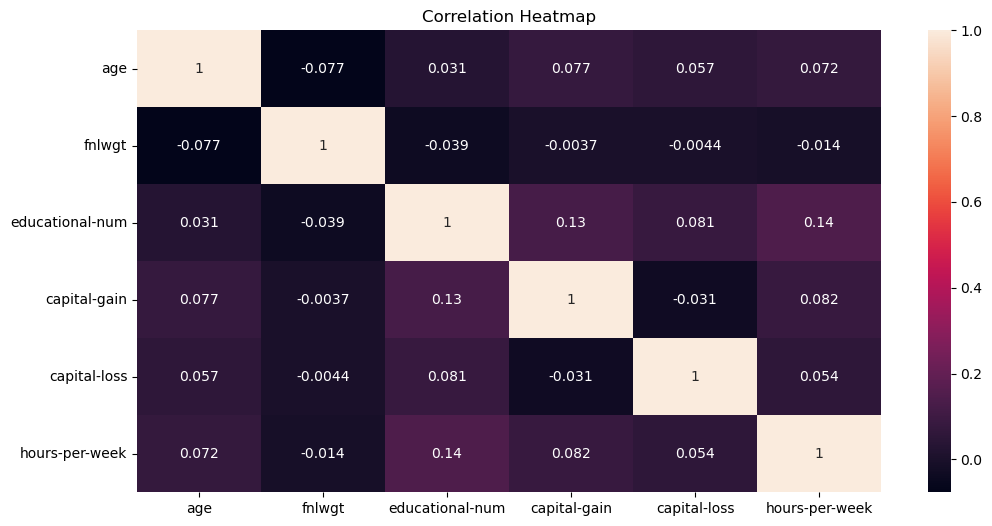

In [169]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

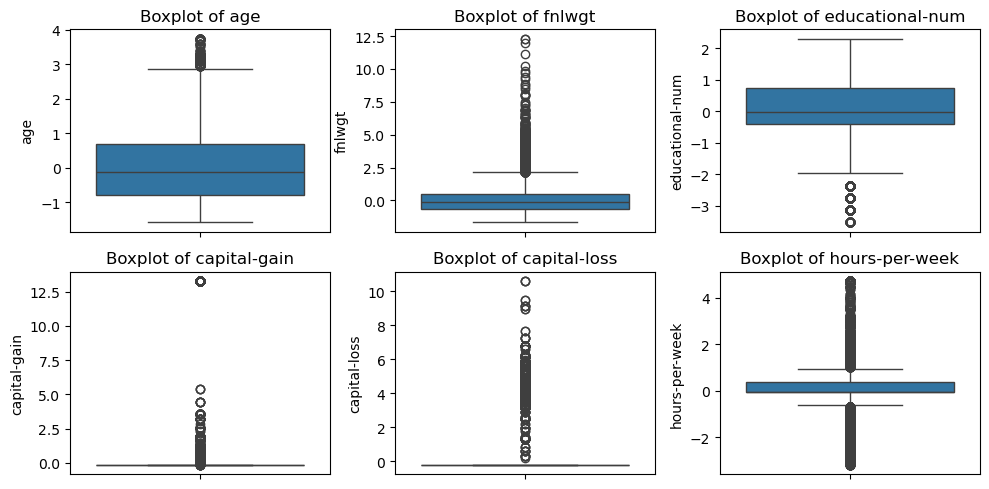

In [170]:
#2.3
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

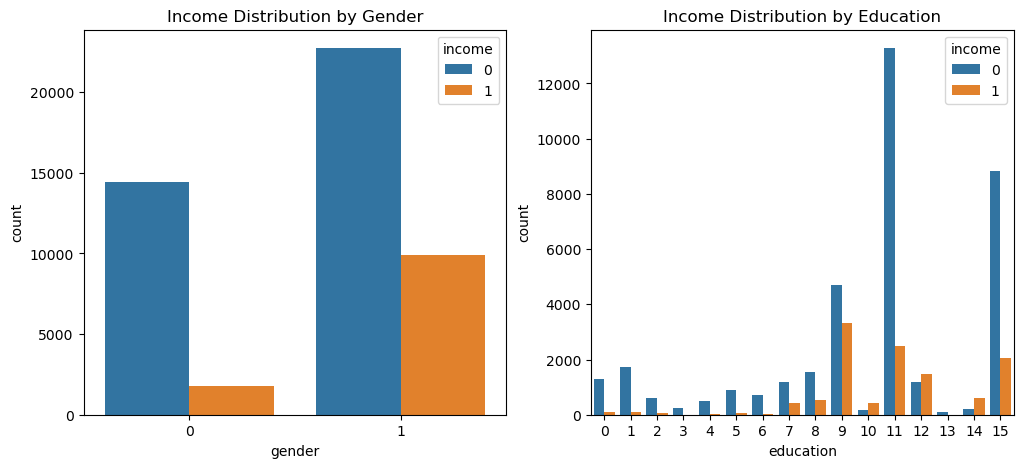

In [171]:
# 2.4 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['gender'], hue=df['income'], data=df)
plt.title('Income Distribution by Gender')
plt.subplot(1, 2, 2)
sns.countplot(x=df['education'], hue=df['income'], data=df)
plt.title('Income Distribution by Education')
plt.show()

In [172]:
#3.1
df.drop(['fnlwgt'], axis=1,inplace=True)

In [176]:
#3.2
scaler = StandardScaler()
df['scaled-age'] = scaler.fit_transform(df[['age']]) 
df['real-age'] = scaler.inverse_transform(df[['scaled-age']])

bins = [0, 25, 45, 65]
labels = ['Young', 'Adult', 'Senior']

df['age_groups'] = pd.cut(df['real-age'], bins=bins, labels=labels)

df['age_groups'] = encoder.fit_transform(df['age_groups'])

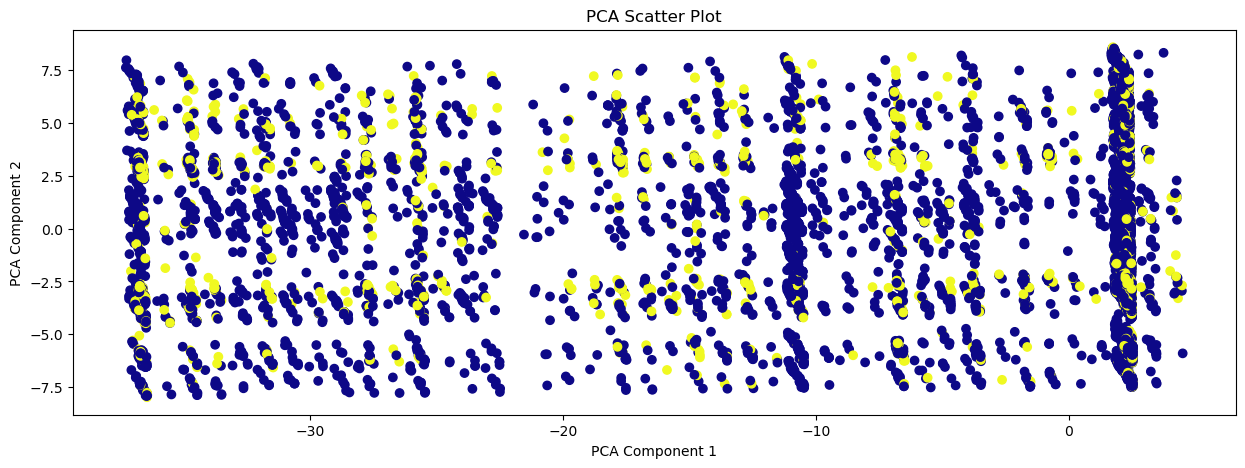

In [177]:
x = df.drop('income', axis=1)
y = df['income']

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
plt.figure(figsize=(15, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='plasma')
plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [186]:
#4.1
x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
print("Precision score is", precision_score(y_test, y_pred))
print("Recall score", recall_score(y_test, y_pred))
print("f1 score is", f1_score(y_test, y_pred))
print("Confusion matrix", confusion_matrix(y_test, y_pred))

Accuracy score is 0.8293581738151294
Precision score is 0.7086403215003348
Recall score 0.46200873362445416
f1 score is 0.5593444356330954
Confusion matrix [[7044  435]
 [1232 1058]]


In [187]:
#4.2
x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
print("Precision score is", precision_score(y_test, y_pred))
print("Recall score ", recall_score(y_test, y_pred))
print("f1 score is", f1_score(y_test, y_pred))
print("Confusion matrix = ", confusion_matrix(y_test, y_pred))

Accuracy score is 0.8265943289998976
Precision score is 0.6295652173913043
Recall score  0.6323144104803493
f1 score is 0.6309368191721133
Confusion matrix =  [[6627  852]
 [ 842 1448]]


In [188]:
#4.3
x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clfRFC = RandomForestClassifier()
clfRFC.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
print("Precision score is", precision_score(y_test, y_pred))
print("Recall score ", recall_score(y_test, y_pred))
print("f1 score is", f1_score(y_test, y_pred))
print("Confusion matrix = ", confusion_matrix(y_test, y_pred))

Accuracy score is 0.8265943289998976
Precision score is 0.6295652173913043
Recall score  0.6323144104803493
f1 score is 0.6309368191721133
Confusion matrix =  [[6627  852]
 [ 842 1448]]


In [189]:
#4.4
x = df.drop('income', axis=1)
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clfSVC = SVC()
clfSVC.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
print("Precision score is", precision_score(y_test, y_pred))
print("Recall score ", recall_score(y_test, y_pred))
print("f1 score is", f1_score(y_test, y_pred))
print("Confusion matrix = ", confusion_matrix(y_test, y_pred))

Accuracy score is 0.8265943289998976
Precision score is 0.6295652173913043
Recall score  0.6323144104803493
f1 score is 0.6309368191721133
Confusion matrix =  [[6627  852]
 [ 842 1448]]


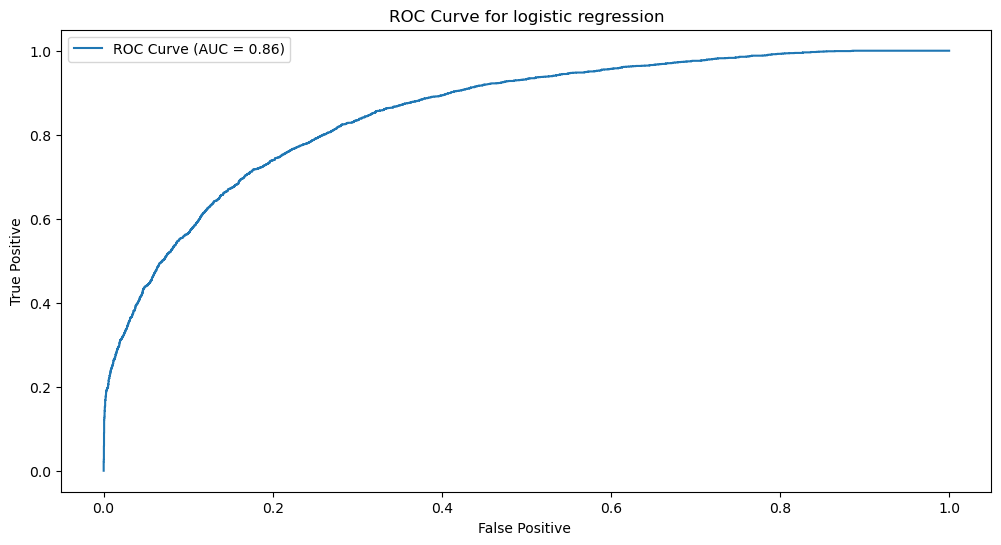

AUC score: 0.8550064781095947


In [194]:
#5.1 logistic is the best performing
y_probability = model.predict_proba(x_test)[:,1]
false_posisitive, true_positive,ends = roc_curve(y_test, y_probability)
roc_auc = auc(false_posisitive, true_positive)

plt.figure(figsize=(12, 6))
plt.plot(false_posisitive, true_positive, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive ')
plt.ylabel('True Positive')
plt.title('ROC Curve for logistic regression')
plt.legend()
plt.show()

print("AUC score:", roc_auc)

In [204]:
#QUESTION 7
data = {
    'age': 37,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 60,
    'native-country': 'United-States'
}
df = pd.DataFrame([data])
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']:
    df[col] = encoder.fit_transform(df[col])
num_cols = ["age","capital-gain","capital-loss","hours-per-week"]
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
df['scaled-age'] = scaler.fit_transform(df[['age']]) 
df['real-age'] = scaler.inverse_transform(df[['scaled-age']])

bins = [0, 25, 45, 65]
labels = ['Young', 'Adult', 'Senior']
df['age_groups'] = pd.cut(df['real-age'], bins=bins, labels=labels)
df['age_groups'] = encoder.fit_transform(df['age_groups'])

x = df.drop('income')
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Income Prediction for Sample: {pred}")

KeyError: "['income'] not found in axis"